<a href="https://colab.research.google.com/github/santoshreddy48/EECE5644-Fall-2019/blob/master/HW3_Solution1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Solution 1

In [0]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn import mixture
from sklearn.model_selection import KFold


In [0]:
def genGMMsamples(prior,totalSamples,u1,u2,u3,u4,sig1,sig2,sig3,sig4):
    
    zero_mean=[0,0]
    cov=[[1,0],[0,1]]
    
    
        
    sampleClass1=[]
    sig1=np.matrix(sig1)
    A1=np.linalg.cholesky(sig1)
 
    sampleClass2=[]
    sig2=np.matrix(sig2)
    A2=np.linalg.cholesky(sig2)

    sampleClass3=[]
    sig3=np.matrix(sig3)
    A3=np.linalg.cholesky(sig3)

    sampleClass4=[]
    sig4=np.matrix(sig4)
    A4=np.linalg.cholesky(sig4)
        
    for i in range(totalSamples):
        sample=np.random.uniform()

        genSample=np.random.multivariate_normal(zero_mean,cov,[1]).transpose()

        if sample<prior[0]:
            tempSample=A1.dot(genSample)+np.matrix(u1).transpose()
            sampleClass1.append(tempSample)
        elif (prior[0]<sample<prior[0]+prior[1]):
            tempSample=A2.dot(genSample)+np.matrix(u2).transpose()
            sampleClass2.append(tempSample)
        elif (prior[0]+prior[1]<sample<prior[0]+prior[1]+prior[2]):
            tempSample=A3.dot(genSample)+np.matrix(u3).transpose()
            sampleClass3.append(tempSample)
        else :
            tempSample=A4.dot(genSample)+np.matrix(u4).transpose()
            sampleClass4.append(tempSample)
                
                
    sampleClass1Final=np.hstack(sampleClass1)
    a=np.squeeze(np.asarray(sampleClass1Final.transpose()[:,1]))
    b=np.squeeze(np.asarray(sampleClass1Final.transpose()[:,0]))

    sampleClass2Final=np.hstack(sampleClass2)
    c=np.squeeze(np.asarray(sampleClass2Final.transpose()[:,1]))
    d=np.squeeze(np.asarray(sampleClass2Final.transpose()[:,0]))

    sampleClass3Final=np.hstack(sampleClass3)
    e=np.squeeze(np.asarray(sampleClass3Final.transpose()[:,1]))
    f=np.squeeze(np.asarray(sampleClass3Final.transpose()[:,0]))

    sampleClass4Final=np.hstack(sampleClass4)
    g=np.squeeze(np.asarray(sampleClass4Final.transpose()[:,1]))
    h=np.squeeze(np.asarray(sampleClass4Final.transpose()[:,0]))


    fig = plt.figure(figsize=(10,10));

    plt.xlabel('Variable x1',size=13)
    plt.ylabel('Variable x2',size=13)

    fig.suptitle('Plot of data sampled from 4 gaussians', fontsize=15)

    plt.scatter(b,a,color='r',marker='o',label='class 1',s=50)
    plt.scatter(d,c,color='g',marker='x',label='class 2',s=50)
    plt.scatter(f,e,color='b',marker='*',label='class 3',s=50)
    plt.scatter(h,g,color='y',marker='P',label='class 4',s=50)
    plt.legend(loc='best')
   
    data=np.hstack([sampleClass1Final,sampleClass2Final,sampleClass3Final,sampleClass4Final])
    return data

def k_fold(genData):
    
    LogLikelihood=[]
    bic=[]
    aic=[]    

    n_components = np.arange(1, 9)    
    models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0)
              for n in n_components]
    
    cv = KFold(n_splits=10, random_state=42, shuffle=True)

    for model in models:
    
        s = []
        s_bic=[]
        s_aic=[]

        for train_index, test_index in cv.split(genData.T):
            X_train, X_test= genData.T[train_index], genData.T[test_index]
            model.fit(X_train) 
            s.append(model.score(X_test)) 
            s_aic.append(model.aic(X_test)) 
            s_bic.append(model.bic(X_test)) 
            

        LogLikelihood.append(-1*sum(s)/len(s)) 
        bic.append(sum(s_bic)/len(s_bic)) 
        aic.append(sum(s_aic)/len(s_aic)) 
    
    fig = plt.figure(figsize=(10,10));
    plt.plot(n_components, LogLikelihood, label='-Log Likelihood')
    plt.xlabel('n Components',size=10);
    plt.ylabel('score',size=10);
    plt.legend(loc='best')
    fig.suptitle('Negative log_likelihood score for different GMM models', fontsize=12)
    plt.show()
    
    fig = plt.figure(figsize=(10,10));
    plt.xlabel('n components',size=13);
    plt.ylabel('score',size=13);
    plt.plot(n_components, bic, label='BIC')
    plt.plot(n_components, aic, label='AIC')
    fig.suptitle('BIC, AIC scores for various GMM models', fontsize=12)
    plt.legend(loc='best')
    plt.show()
    return 

### Answer part 1. True GMM


 Number of samples:  10




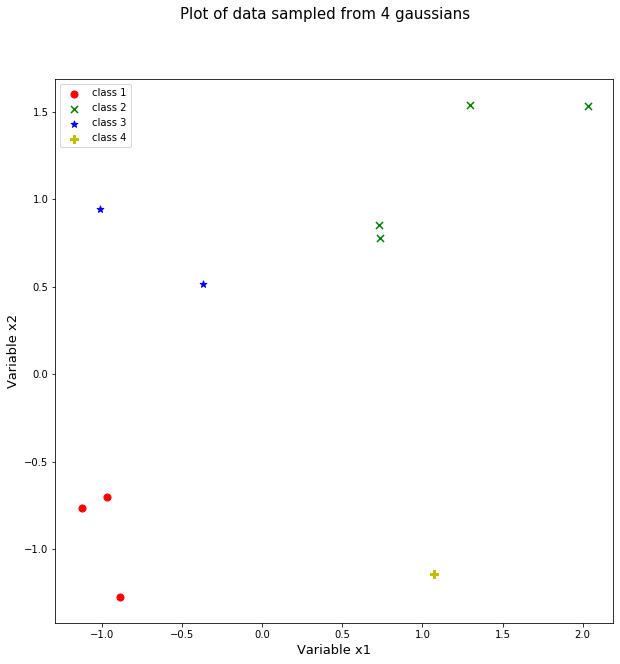

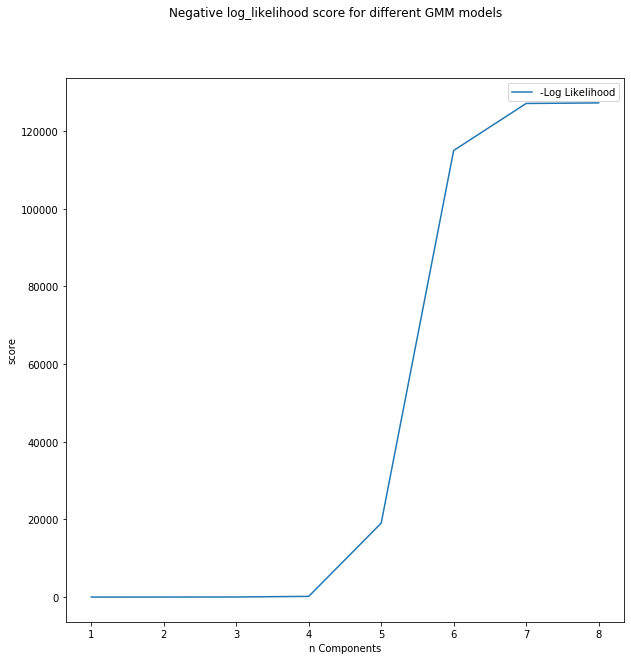

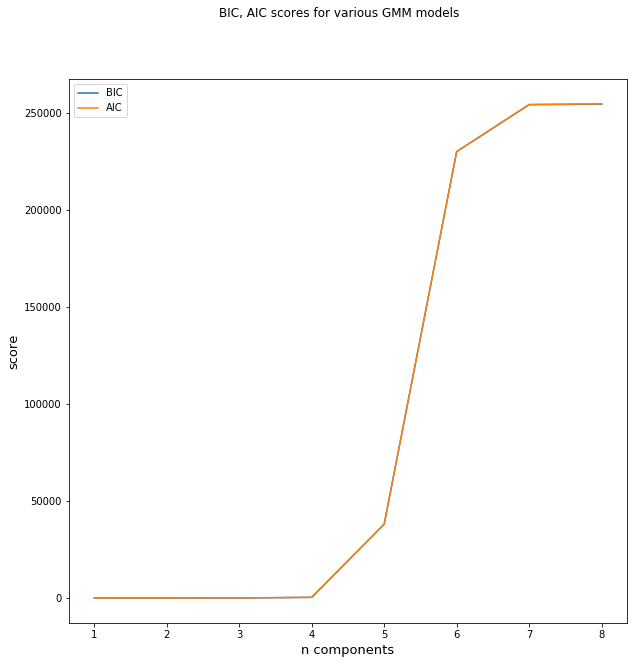


 Number of samples:  100




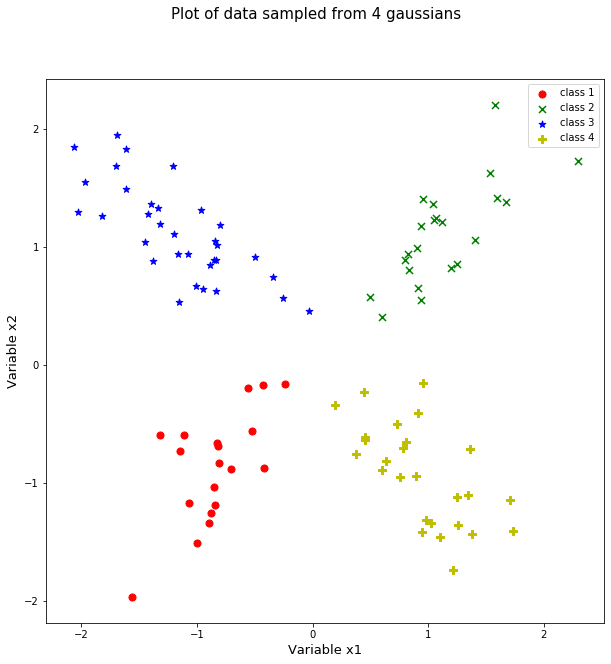

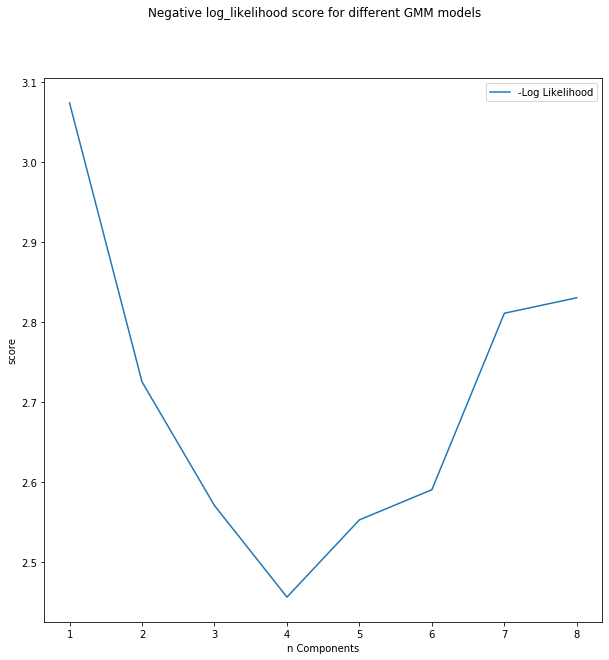

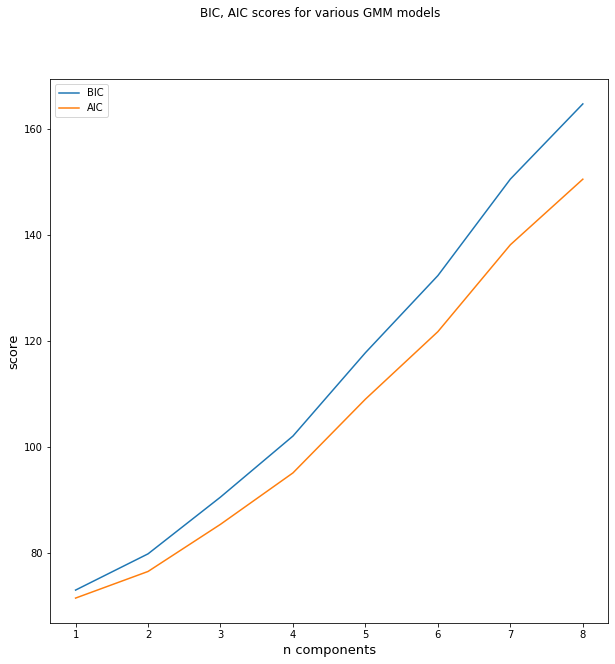


 Number of samples:  1000




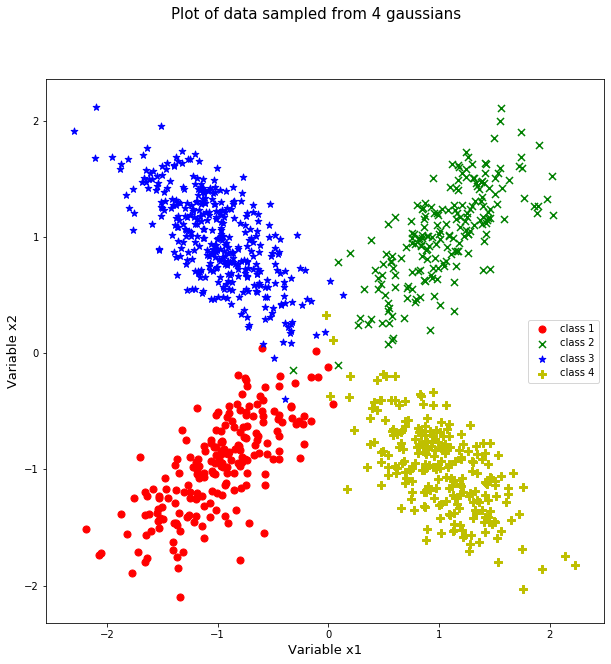

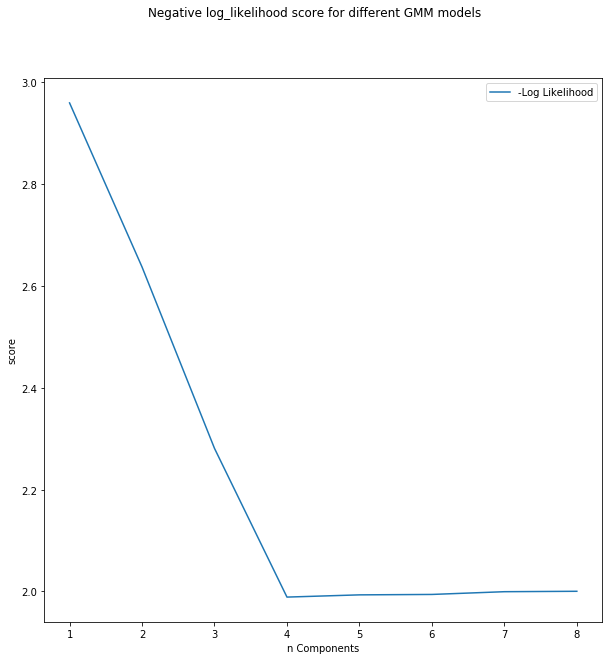

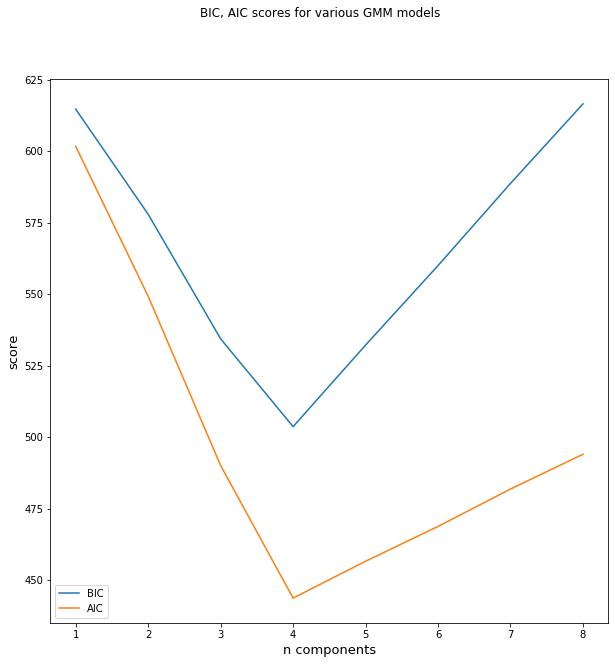


 Number of samples:  10000




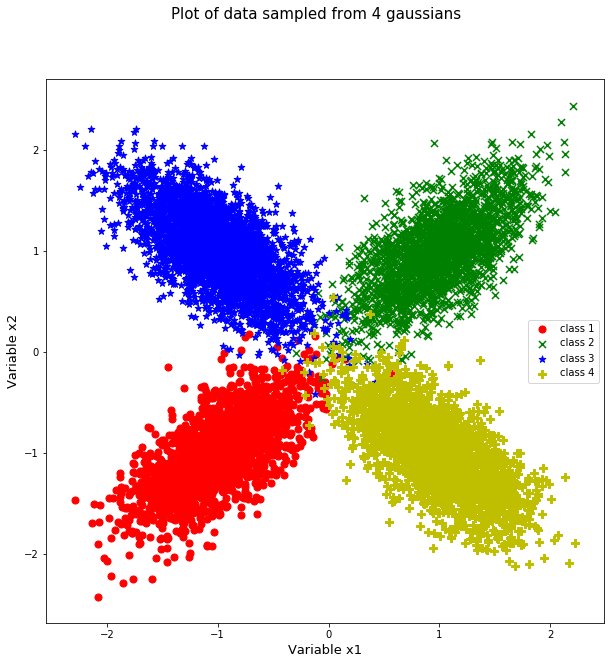

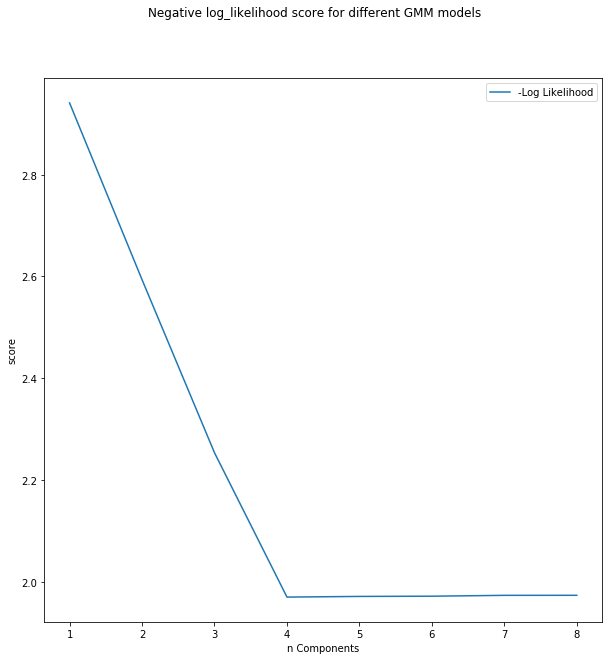

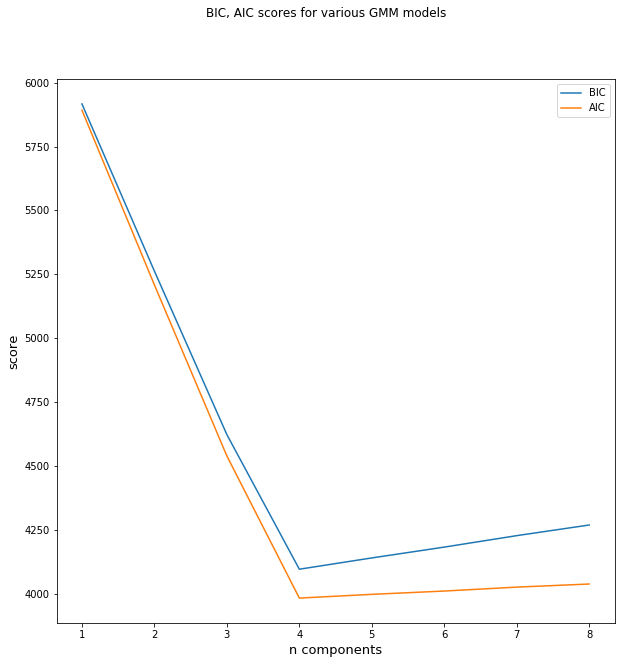

In [0]:
sig1=[[0.15,-0.1],[0.1,0.15]]
sig2=[[0.15,0.1],[0.1,0.15]]
sig3=[[0.15,0.1],[-0.1,0.15]]
sig4=[[0.15,0.1],[-0.1,0.15]]

for total in [10,100, 1000, 10000]:
    print ("\n Number of samples: ",total)
    genData=genGMMsamples([0.19,0.21,0.36,0.24],total,[-1,-1],[1,1],[-1,1],[1,-1],sig1,sig2,sig3,sig4,);
    print ('\n')
    k_fold(genData)

### Conclusion

For sample size 1000 or 10000, Log-Likelihood and bic/aic score indicate number of components = 4 as a good model for the data shown above. 
Also, at n components = 4, the score remains stagnant afetr 4. 